In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import json

In [6]:
# import annotations.JSON file
with open('train_data/annotations.json') as json_file:
    annotations = json.load(json_file)
    
masks = []
imgs = []
ids = list(annotations.keys())
for id in ids:
    try:
        try:
            img = Image.open(f'train_data/raw/training_images/{id}.jpg',)
        except:
            img = Image.open(f'train_data/raw/training_images/{id}.png',)
        
        # if grascale convert to RGB
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        img = img.resize((320, 320))

        # create empty mask image
        mask = Image.new('RGB', img.size, (0, 0, 0))
        maskR, maskG, maskB = mask.split()

        # draw ellipse, red is inside, green is outside
        drawR = ImageDraw.Draw(maskR)
        drawR.ellipse(([i*320 for i in annotations[id]['inside_plate']['box']]), fill=255)
        
        drawG = ImageDraw.Draw(maskG)
        drawG.ellipse(([i*320 for i in annotations[id]['outside_plate']['box']]), fill=255)
        
        img = np.array(img, dtype=np.uint8)
        mask = np.array(np.stack((maskR, maskG), axis=-1), dtype=np.uint8)
        imgs.append(img)
        masks.append(mask)
    except:
        print(f'{id} is missing')
    
np.savez_compressed('train_data.npz', imgs=np.stack(imgs, 0), masks=np.stack(masks, 0))

101531466000 is missing


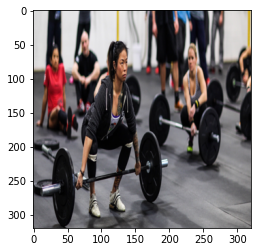

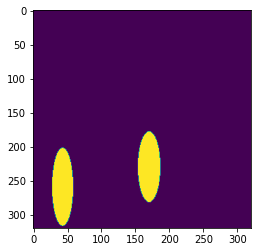

In [64]:
idx = np.random.randint(0, len(imgs))
plt.imshow(imgs[idx])
plt.show()
plt.imshow(masks[idx].mean(axis=-1))
plt.show()